In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
from numpy.linalg import inv
%matplotlib inline

# define the rosenbrock function

here we define the rosenbrock function, with A = 100 for one and A = 1 for the othe one

$f = A(x_2 - x_1^2)^2 + (1-x_1)^2 $

In [2]:
def rosenbrock_100(s):
  f = 100*(s[1,0]-s[0,0]**2)**2 + (1-(s[0,0]))**2
  return f

In [3]:
def rosenbrock_one(s):
  f = (s[1,0]-s[0,0]**2)**2 + (1-(s[0,0]))**2
  return f

#Armijo rule 

A step length $\alpha_k$ is said to satisfy the *Wolfe conditions*, restricted to the direction $\mathbf{P}_k$ , if the following two iequalities hold:

**i)** $f(x_k + \alpha_k\mathbf{P}_k)\leq f(x_k) + c_1\alpha_k\mathbf{P}_k^\intercal\nabla f(x_k) $

**ii)** $-\mathbf{P}_k \nabla f(x_k + \alpha_k\mathbf{P}_k) \leq -c_2\mathbf{P}_k^\intercal\nabla f(x_k)$


with 0 < $c_1 < c_2 < 1$(in examining condition(ii), recall that to ensure that $\mathbf{P}_k $is a descent direction, we have$\mathbf{P}_k^\intercal\nabla f(x_k) < 0$ , as in the case of gradient descent,

$where \mathbf{P}_k = - \nabla f(x_k) $


In [4]:
def Armijo_rosenbrock_1(x,alpha_0,grad_f,c,rho):  
  alpha = alpha_0
  while rosenbrock_one(s = (x + alpha*(-grad_f)))  -  rosenbrock_one(s=x) - c*alpha*((-grad_f.T)@(-grad_f)) > 0 : 
    alpha = rho*alpha
  return alpha

# GradientDescent with A = 1

In [5]:
def GradientDescent_Rosenbrock_A_1(x_0,c,iteration,alpha_0,rho):
  


  cost = []     
  norm = []
  x_pathx = []
  x_pathy = []
  x = x_0

  for i in range(iteration):

    grad_f = np.array([[4*(x[0,0]**3) - 4*x[0,0]*x[1,0] + 2*x[0,0] - 2],[2*x[1,0]-2*(x[0,0]**2)]])
    
    #armijo condition
    alpha = Armijo_rosenbrock_1(x,alpha_0 = 1,grad_f =np.array([[4*(x[0,0]**3) - 4*x[0,0]*x[1,0] + 2*x[0,0] - 2],[2*x[1,0]-2*(x[0,0]**2)]]),c = 0.001,rho = 0.5)
    
    
    


    learning_rate = alpha
    x = x - learning_rate*grad_f #algrithm for gradientDescent
    f = 100*(x[1,0]-x[0,0]**2)**2 + (1-(x[0,0]))**2
    
    
    cost.append(f)
    
    #print(x,'\n')
    norm.append(LA.norm(grad_f))
    x_pathx.append(x[0,0])
    x_pathy.append(x[1,0])
    if LA.norm(grad_f)< 10**-3 :
      break
  


  print('norm after iteration:',LA.norm(grad_f),'\n')
  
  print('x position after algrithm:', x,'\n')
  print('iter took :',i ,'\n')
  print('function valuve at x is :',f,'\n')

  print('\n')
  print('\n')


  print('cost value graph','\n')
  plt.plot(cost)
  plt.yscale('log')
  plt.ylabel('cost value')
  plt.xlabel('iteraions')
  plt.show()
  
  print('\n')
  print('\n')

  print('grad norm graph \n')
  plt.plot(norm)
  plt.yscale('log')
  plt.ylabel('grad norm')
  plt.xlabel('iteraions')
  plt.show()
  
  print('\n')
  print('\n')


  print('x position progression ,blue dot is solution [1,1]\n')
  xlist = np.linspace(0.4, 1.2, 10)
  ylist = np.linspace(0.68, 1.25, 10)
  X, Y = np.meshgrid(xlist, ylist)
  Z = (Y-X**2)**2 + (1-(X))**2
  fig,ax=plt.subplots(1,1)
  cp = ax.contourf(X, Y, Z)
  fig.colorbar(cp) # Add a colorbar to a plot
  ax.set_title('Filled Contours Plot')
  #ax.set_xlabel('x (cm)')
  ax.set_ylabel('y (cm)')
  plt.plot(x_pathx,x_pathy,'k')
  plt.plot(x_pathx,x_pathy,'ro')
  plt.plot(1,1,'bo')
  plt.show()





  return 

norm after iteration: 0.0009710103490858382 

x position after algrithm: [[0.99923659]
 [0.99847022]] 

iter took : 70 

function valuve at x is : 5.840513324917008e-07 





cost value graph 



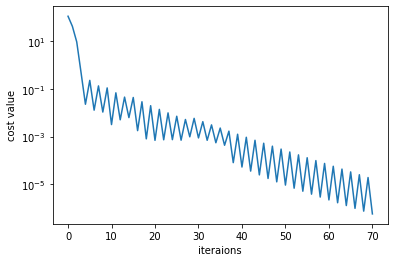





grad norm graph 



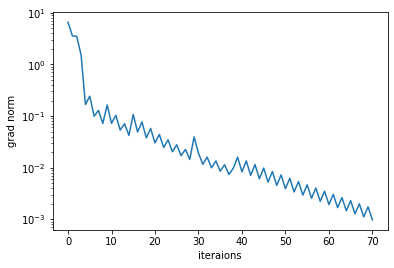





x position progression ,blue dot is solution [1,1]



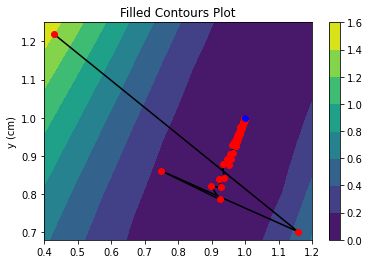

In [6]:
GradientDescent_Rosenbrock_A_1(x_0=np.array([[-1.2],[1]]),
        alpha_0 = 1,c = 0.01,iteration =10000,rho=0.5)


# GradientDescent with A=100

In [7]:
def Armijo_rosenbrock_100(x,alpha_0,grad_f,c,rho):  
  alpha = alpha_0
  while rosenbrock_100(x + alpha*(-grad_f))  -  rosenbrock_100(x) - c*alpha*((-grad_f.T)@(grad_f)) > 0 :
      
    alpha = rho*alpha
  return alpha

In [8]:
def GradientDescent_Rosenbrock_A_100(x_0,c,iteration,alpha_0,rho):
  


  cost = []     
  norm = []
  x_pathx = []
  x_pathy = []
  
  
  
  x = x_0
  for i in range(iteration):
    
    grad_f = np.array([[400*(x[0,0]**3) - 400*x[0,0]*x[1,0] + 2*x[0,0] - 2],[200*x[1,0]-200*(x[0,0]**2)]]) 


    #armijo condition
    alpha = Armijo_rosenbrock_100(x,alpha_0 = 1,grad_f =grad_f,c = 0.01,rho = 0.5 )
    


    x = x - alpha*grad_f #algrithm for gradientDescent
    f = 100*(x[1,0]-x[0,0]**2)**2 + (1-(x[0,0]))**2
    cost.append(f)
    

    norm.append(LA.norm(grad_f))
    x_pathx.append(x[0,0])
    x_pathy.append(x[1,0])
    if LA.norm(grad_f)<10**-3:
      break
    
  
  print('norm after iteration:',LA.norm(grad_f),'\n')
  
  print('x position after algrithm:', x,'\n')
  print('iter took :',i ,'\n')
  print('function valuve at x is :',f,'\n')

  print('\n')
  print('\n')


  print('cost value graph','\n')
  plt.plot(cost)
  plt.yscale('log')
  plt.ylabel('cost value')
  plt.xlabel('iteraions')
  plt.show()
  
  print('\n')
  print('\n')

  print('grad norm graph \n')
  plt.plot(norm)
  plt.yscale('log')
  plt.ylabel('grad norm')
  plt.xlabel('iteraions')
  plt.show()
  
  print('\n')
  print('\n')


  print('x position progression ,blue dot is solution [1,1]\n')
  xlist = np.linspace(-1.2, 1.2, 10)
  ylist = np.linspace(0.85, 1.1, 10)
  X, Y = np.meshgrid(xlist, ylist)
  Z = (Y-X**2)**2 + (1-(X))**2
  fig,ax=plt.subplots(1,1)
  cp = ax.contourf(X, Y, Z)
  fig.colorbar(cp) # Add a colorbar to a plot
  ax.set_title('Filled Contours Plot')
  #ax.set_xlabel('x (cm)')
  ax.set_ylabel('y (cm)')
  plt.plot(x_pathx,x_pathy,'k')
  plt.plot(x_pathx,x_pathy,'ro')
  plt.plot(1,1,'bo')
  plt.show()




  return 

norm after iteration: 0.0009885217585716248 

x position after algrithm: [[0.99922242]
 [0.99843779]] 

iter took : 5047 

function valuve at x is : 6.104969995809916e-07 





cost value graph 



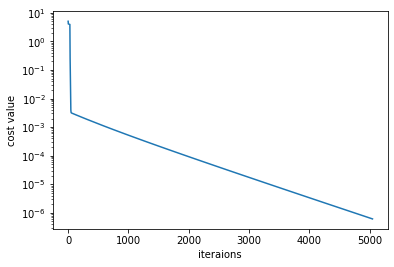





grad norm graph 



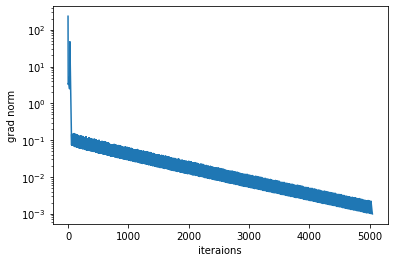





x position progression ,blue dot is solution [1,1]



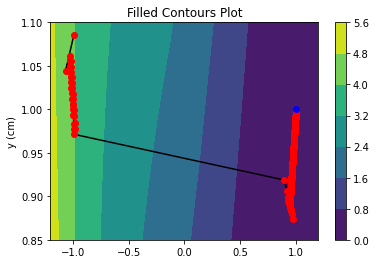

In [9]:
GradientDescent_Rosenbrock_A_100(x_0=np.array([[-1.2],[1]]),
        alpha_0 = 1,c = 0.01,iteration =10000,rho=0.5)

# Newton iterations with A = 100

In [10]:
def Newton_iteration_A_100(iteration,alpha_0,c,rho,x_0):


  x= x_0
  cost = []
  norm = []
  x_pathx = []
  x_pathy = []
  for i in range(iteration):
    a = x[0,0]
    b= x[1,0]
    hessian = np.array([[-400*(b-a**2)+800*a**2+2,-400*a],[-400*a,200]])
    hessian_inv = inv(hessian)
    grad_f = np.array([[400*(a**3) - 400*a*b + 2*a - 2],[200*b-200*(a**2)]])


    p = (-hessian_inv.T @ grad_f) 
    pk = p.T @ grad_f
    
    #armijo condition
    
    alpha = alpha_0
    while (rosenbrock_100(x - alpha*(hessian_inv @ grad_f)) - rosenbrock_100(x) - c*alpha*(pk[0,0])) > 0 :
      
      alpha = rho*alpha
      




    x = x - alpha*hessian_inv @ grad_f
    f = 100*(x[0,0]-x[1,0]**2)**2 + (1-(x[1,0]))**2
    cost.append(f)
    norm.append(LA.norm(grad_f))
    x_pathx.append(x[0,0])
    x_pathy.append(x[1,0])
    if LA.norm(grad_f)<10**-3:
      break
    
  print('norm after iteration:',LA.norm(grad_f),'\n')
  
  print('x position after algrithm:', x,'\n')
  print('iter took :',i ,'\n')
  print('function valuve at x is :',f,'\n')

  print('\n')
  print('\n')


  print('cost value graph','\n')
  plt.plot(cost)
  plt.ylabel('cost value')
  plt.xlabel('iteraions')
  plt.show()
  
  print('\n')
  print('\n')

  print('grad norm graph \n')
  plt.plot(norm)
  plt.ylabel('grad norm')
  plt.xlabel('iteraions')
  plt.show()
  
  print('\n')
  print('\n')


  xlist = np.linspace(-1.5, 1.2, 10)
  ylist = np.linspace(-0.3, 1.5, 10)
  X, Y = np.meshgrid(xlist, ylist)
  Z = (Y-X**2)**2 + (1-(X))**2
  fig,ax=plt.subplots(1,1)
  cp = ax.contourf(X, Y, Z)
  fig.colorbar(cp) # Add a colorbar to a plot
  ax.set_title('Filled Contours Plot')
  #ax.set_xlabel('x (cm)')
  ax.set_ylabel('y (cm)')
  plt.plot(x_pathx,x_pathy,'k')
  plt.plot(x_pathx,x_pathy,'ro')
  plt.plot(1,1,'bo')
  plt.show()


  return 

norm after iteration: 0.00011871675914534802 

x position after algrithm: [[1.]
 [1.]] 

iter took : 20 

function valuve at x is : 3.336184810652939e-18 





cost value graph 



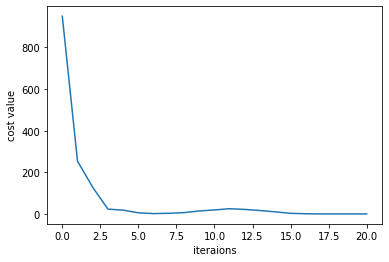





grad norm graph 



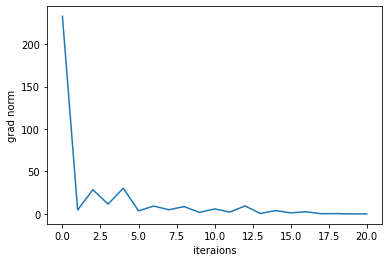

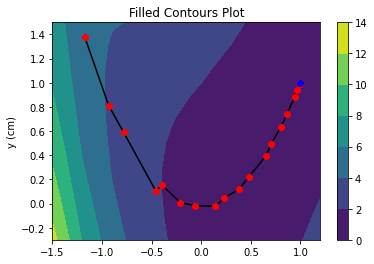

In [11]:
Newton_iteration_A_100(iteration = 10000,alpha_0 = 1,c = 0.01,rho = 0.5,x_0 = np.array([[-1.2],[1]]) )

# Newton iteration with A = 1

In [12]:
def Newton_iteration_A_1(iteration,alpha_0,c,rho,x_0):


  x= x_0
  cost = []
  norm = []
  x_pathx = []
  x_pathy = []
  
  for i in range(iteration):
    a = x[0,0]
    b= x[1,0]
    hessian = np.array([[-4*(b-a**2)+8*a**2+2,-4*a],[-4*a,2]])
    hessian_inv = inv(hessian)
    grad_f = np.array([[4*(a**3) - 4*a*b + 2*a - 2],[2*b-2*(a**2)]])
    p = (-hessian_inv.T @ grad_f) 
    pk = p.T @ grad_f
       
    
    
    alpha = alpha_0
    while (rosenbrock_100(x - alpha*(hessian_inv @ grad_f)) - rosenbrock_100(x) + c*alpha*(pk[0,0])) > 0:
      
      alpha = rho*alpha
      


    
    x = x - alpha*(hessian_inv @ grad_f)
    f = (x[0,0]-x[1,0]**2)**2 + (1-(x[1,0]))**2
    cost.append(f)
    norm.append(LA.norm(grad_f))
    x_pathx.append(x[0,0])
    x_pathy.append(x[1,0])
    if LA.norm(grad_f)<10**-3:
      break
    
  print('norm after iteration:',LA.norm(grad_f),'\n')
  
  print('x position after algrithm:', x,'\n')
  print('iter took :',i ,'\n')
  print('function valuve at x is :',f,'\n')

  print('\n')
  print('\n')


  print('cost value graph','\n')
  plt.plot(cost)
  plt.yscale('log')
  plt.ylabel('cost value')
  plt.xlabel('iteraions')
  plt.show()
  
  print('\n')
  print('\n')

  print('grad norm graph \n')
  plt.plot(norm)
  plt.yscale('log')
  plt.ylabel('grad norm')
  plt.xlabel('iteraions')
  plt.show()
  
  print('\n')
  print('\n')


  print('x position progression ,blue dot is solution [1,1]\n')
  xlist = np.linspace(-1.5, 1.2, 10)
  ylist = np.linspace(-0.4, 1.5, 10)
  X, Y = np.meshgrid(xlist, ylist)
  Z = (Y-X**2)**2 + (1-(X))**2
  fig,ax=plt.subplots(1,1)
  cp = ax.contourf(X, Y, Z)
  fig.colorbar(cp) # Add a colorbar to a plot
  ax.set_title('Filled Contours Plot')
  #ax.set_xlabel('x (cm)')
  ax.set_ylabel('y (cm)')
  plt.plot(x_pathx,x_pathy,'k')
  plt.plot(x_pathx,x_pathy,'ro')
  plt.plot(1,1,'bo')
  plt.show()



  return 

norm after iteration: 0.0006525928978467328 

x position after algrithm: [[0.99999961]
 [0.99999869]] 

iter took : 8 

function valuve at x is : 6.662405850628654e-12 





cost value graph 



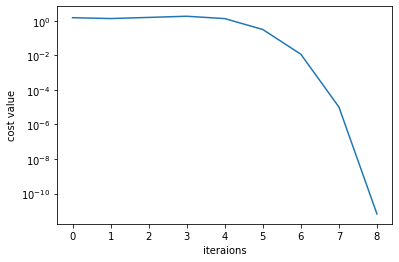





grad norm graph 



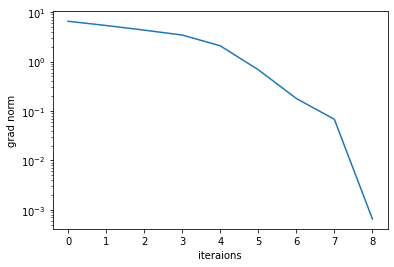





x position progression ,blue dot is solution [1,1]



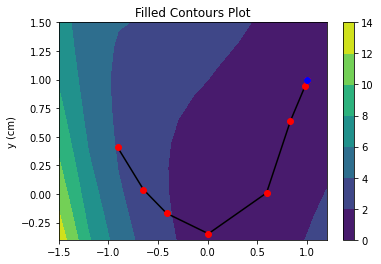

In [13]:
Newton_iteration_A_1(iteration = 1000,alpha_0 = 1,c = 0.01,rho = 0.5,x_0 = np.array([[-1.2],[1]]) )